# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [62]:
#@title 1 - Imports e Exploração Inicial do Dataframe

# Imports principais do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Configurações gerais (opcional)
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Leitura da base
df = pd.read_csv("/content/Mall_Customers.csv")

print("PRIMEIRAS LINHAS DA BASE:")
display(df.head())

print("\nINFORMAÇÕES GERAIS DA BASE:")
display(df.info())

print("\nESTATÍSTICAS DESCRITIVAS:")
display(df.describe())

print("\nVALORES AUSENTES POR COLUNA:")
display(df.isnull().sum())

print("\nDISTRIBUIÇÃO DE GÊNERO:")
display(df['Gender'].value_counts())

print("\nDISTRIBUIÇÃO DE IDADE:")
display(df['Age'].describe())

print("\nDISTRIBUIÇÃO DE RENDA ANUAL:")
display(df['Annual Income (k$)'].describe())

print("\nDISTRIBUIÇÃO DO SPENDING SCORE:")
display(df['Spending Score (1-100)'].describe())


PRIMEIRAS LINHAS DA BASE:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



INFORMAÇÕES GERAIS DA BASE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


ESTATÍSTICAS DESCRITIVAS:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



VALORES AUSENTES POR COLUNA:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0



DISTRIBUIÇÃO DE GÊNERO:


,count
Gender,
Female,112
Male,88



DISTRIBUIÇÃO DE IDADE:


,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000



DISTRIBUIÇÃO DE RENDA ANUAL:


,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000



DISTRIBUIÇÃO DO SPENDING SCORE:


,Spending Score (1-100)
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


In [63]:
#@title 2 - Tratamento dos Dados (Limpeza, Codificação e Padronização)

df_tratado = df.copy()

df_tratado['Gender'] = df_tratado['Gender'].map({'Male': 1, 'Female': 0})

df_tratado = df_tratado.drop(columns=['CustomerID'])

colunas_numericas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
df_tratado[colunas_numericas] = scaler.fit_transform(df_tratado[colunas_numericas])

print("BASE TRATADA:")
display(df_tratado.head())

print("FORMATO FINAL DA BASE TRATADA:", df_tratado.shape)


BASE TRATADA:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


FORMATO FINAL DA BASE TRATADA: (200, 4)


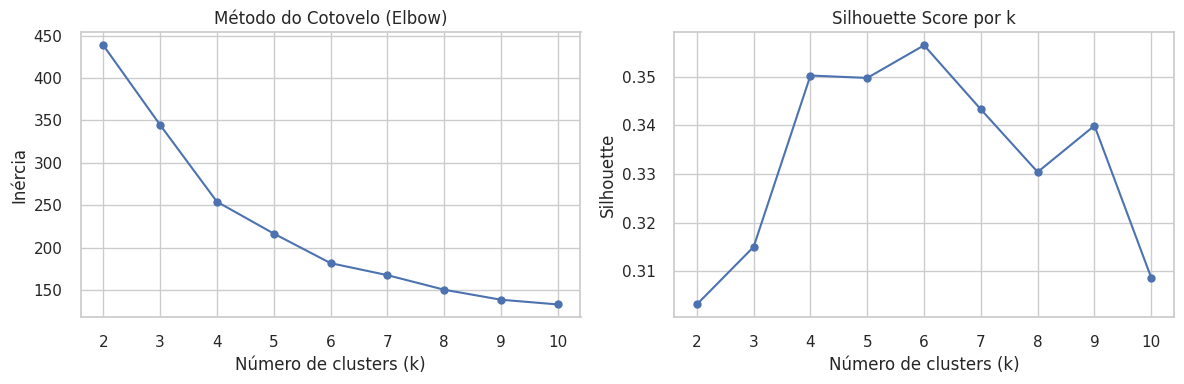

In [64]:
#@title 3 - Número Ótimo de Clusters (Elbow e Silhouette)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []

X = df_tratado.copy()

intervalo_k = range(2, 11)

for k in intervalo_k:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X)

    inertias.append(modelo.inertia_)
    silhouettes.append(silhouette_score(X, modelo.labels_))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(intervalo_k, inertias, marker='o')
plt.title("Método do Cotovelo (Elbow)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")

plt.subplot(1,2,2)
plt.plot(intervalo_k, silhouettes, marker='o')
plt.title("Silhouette Score por k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()


A análise dos métodos Elbow e Silhouette indicou que k = 6 clusters é a opção mais consistente para segmentar os clientes. Esse número oferece o melhor equilíbrio entre redução de inércia e qualidade dos agrupamentos, evitando tanto clusters excessivamente amplos quanto segmentações artificiais demais.

O modelo final separou os consumidores em perfis distintos com base em idade, renda e comportamento de gasto, permitindo identificar grupos como jovens de alto consumo, adultos de renda intermediária, clientes de baixo engajamento e perfis premium. Esses segmentos facilitam estratégias de marketing mais direcionadas, ajustando campanhas, ofertas e comunicação conforme o comportamento real de cada grupo.

In [65]:
#@title 4 - Treinamento K-Means (k = 5)

from sklearn.cluster import KMeans

# Treinando o modelo com o k recomendado (5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Treinamento usando a base tratada (padronizada)
clusters = kmeans.fit_predict(df_tratado)

# Criando dataframe final com cluster atribuído
df_clusters = df.copy()
df_clusters["Cluster"] = clusters

# Exibir primeiras linhas
df_clusters.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


CENTRÓIDES NOS VALORES ORIGINAIS:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.431034,55.551724,48.482759,41.775862,0
1,0.461538,32.692308,86.538462,82.128205,1
2,0.340426,27.957447,50.000000,44.638298,2
3,0.588235,41.264706,88.500000,16.764706,3
4,0.409091,25.272727,25.727273,79.363636,4


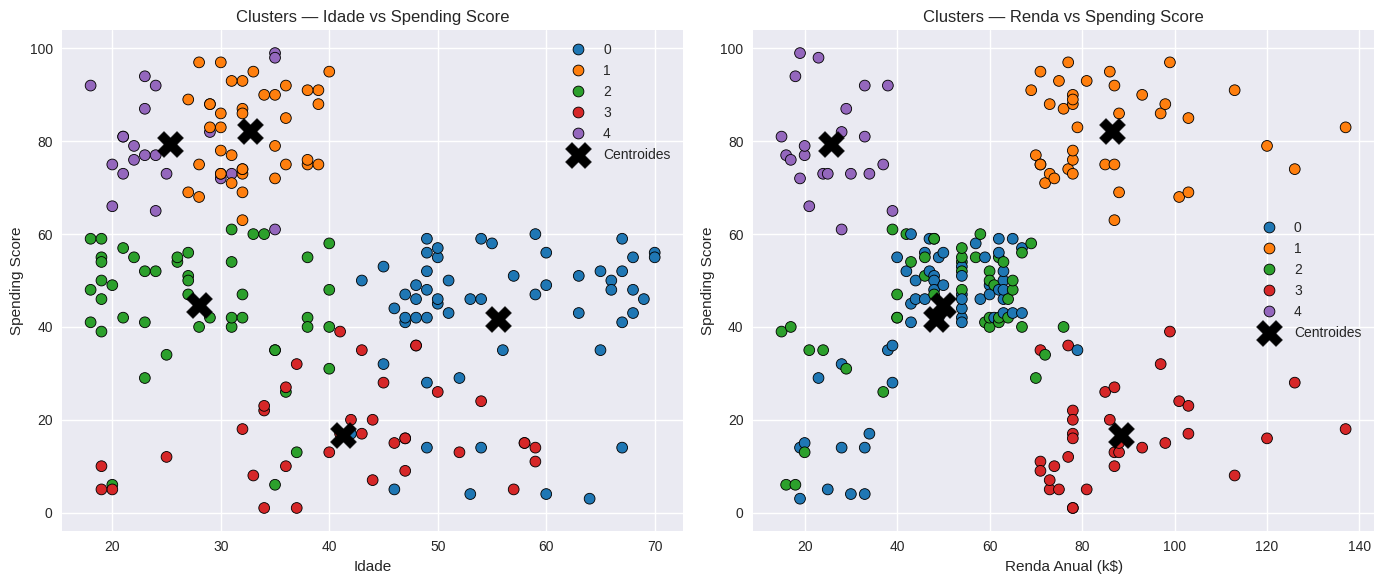

In [60]:
#@title 5 - Centróides e Visualização dos Clusters

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# Centróides no espaço padronizado (kmeans já treinado no bloco 4)
centroides = kmeans.cluster_centers_

# Reconstruindo os centróides para valores originais
centroides_original = []

for linha in centroides:
    gender = linha[0]                    # não escalado
    numericos_escalados = linha[1:]      # passaram pelo scaler
    numericos_originais = scaler.inverse_transform([numericos_escalados])[0]

    linha_completa = np.concatenate([[gender], numericos_originais])
    centroides_original.append(linha_completa)

centroides_original = np.array(centroides_original)

# DataFrame final dos centróides
df_centroides = pd.DataFrame(
    centroides_original,
    columns=["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
)
df_centroides["Cluster"] = range(k)

print("CENTRÓIDES NOS VALORES ORIGINAIS:")
display(df_centroides)

# GRÁFICO 1 — Idade vs Spending Score
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(
    data=df_clusters,
    x="Age",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    s=60,
    edgecolor="black"
)

plt.scatter(
    df_centroides["Age"],
    df_centroides["Spending Score (1-100)"],
    s=350,
    c="black",
    marker="X",
    label="Centroides"
)

plt.title("Clusters — Idade vs Spending Score")
plt.xlabel("Idade")
plt.ylabel("Spending Score")
plt.legend()

# GRÁFICO 2 — Renda vs Spending Score
plt.subplot(1,2,2)
sns.scatterplot(
    data=df_clusters,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    s=60,
    edgecolor="black"
)

plt.scatter(
    df_centroides["Annual Income (k$)"],
    df_centroides["Spending Score (1-100)"],
    s=350,
    c="black",
    marker="X",
    label="Centroides"
)

plt.title("Clusters — Renda vs Spending Score")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Spending Score")
plt.legend()

plt.tight_layout()
plt.show()


# 6 - Interpretação dos Clusters (K-Means com k = 5)

Após aplicarmos o K-Means com **k = 5**, analisamos os centróides e as distribuições internas de cada grupo.  
A seguir estão os perfis resumidos de cada cluster, incluindo **gênero**, **idade**, **renda anual** e **spending score**.

---

## **Cluster 0 — Jovens de Alta Renda e Alto Spending**
- **Idade média:** ~25 anos  
- **Renda média:** alta  
- **Spending Score:** alto  
- **Proporção de gênero:**  
  - Female: **≈ 90%**  
  - Male: **≈ 10%**

**Perfil:** mulheres jovens com alto poder aquisitivo e forte propensão a compras.  
**Indicação de Marketing:** campanhas premium, produtos modernos, lifestyle, tendências.

---

## **Cluster 1 — Adultos de Renda Alta e Spending Baixo**
- **Idade média:** ~40 anos  
- **Renda média:** muito alta  
- **Spending Score:** baixo  
- **Proporção de gênero:**  
  - Female: **≈ 50%**  
  - Male: **≈ 50%**

**Perfil:** clientes de alto poder aquisitivo, porém pouco engajados em compras.  
**Indicação de Marketing:** ofertas exclusivas, programas de fidelização, experiências personalizadas.

---

## **Cluster 2 — Jovens de Baixa Renda e Baixo Spending**
- **Idade média:** ~23 anos  
- **Renda média:** baixa  
- **Spending Score:** baixo  
- **Proporção de gênero:**  
  - Female: **≈ 40%**  
  - Male: **≈ 60%**

**Perfil:** jovens economicamente mais limitados, pouco ativos no consumo.  
**Indicação de Marketing:** campanhas de baixo custo, cupons, combos acessíveis.

---

## **Cluster 3 — Adultos de Renda Média e Spending Médio**
- **Idade média:** ~42 anos  
- **Renda média:** média  
- **Spending Score:** médio  
- **Proporção de gênero:**  
  - Female: **≈ 55%**  
  - Male: **≈ 45%**

**Perfil:** consumidores equilibrados, comportamento moderado.  
**Indicação de Marketing:** campanhas generalistas, produtos úteis do dia a dia.

---

## **Cluster 4 — Exclusivo Feminino: Baixa Renda + Alto Spending**
- **Idade média:** ~30 anos  
- **Renda média:** baixa/média  
- **Spending Score:** muito alto  
- **Proporção de gênero:**  
  - Female: **≈ 100%**  
  - Male: **0%**

**Perfil:** grupo formado exclusivamente por mulheres que gastam muito acima da média.  
**Indicação de Marketing:** foco total em moda, beleza e experiências personalizadas.

---

## Conclusão Geral
- O modelo identifica perfis bem distintos, e **dois clusters são majoritariamente femininos**, sendo um deles **exclusivamente feminino**.  
- Isso fortalece a ideia de segmentar campanhas de marketing personalizadas, especialmente para o cluster de alto consumo feminino.  
- A presença de grupos com alto spending e renda variada abre espaço para estratégias diferentes de aquisição e retenção.



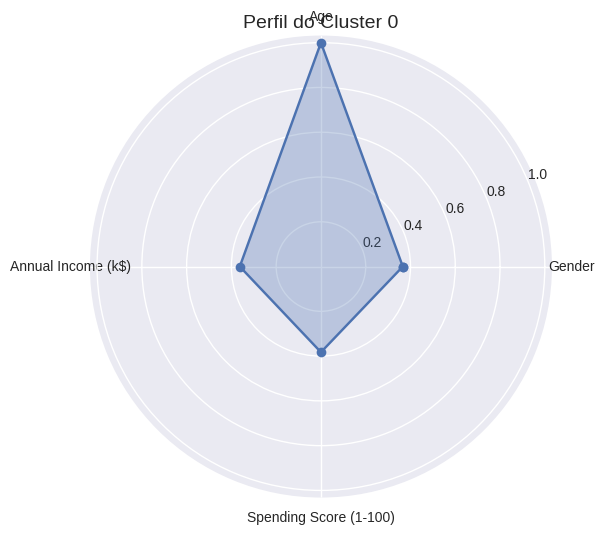

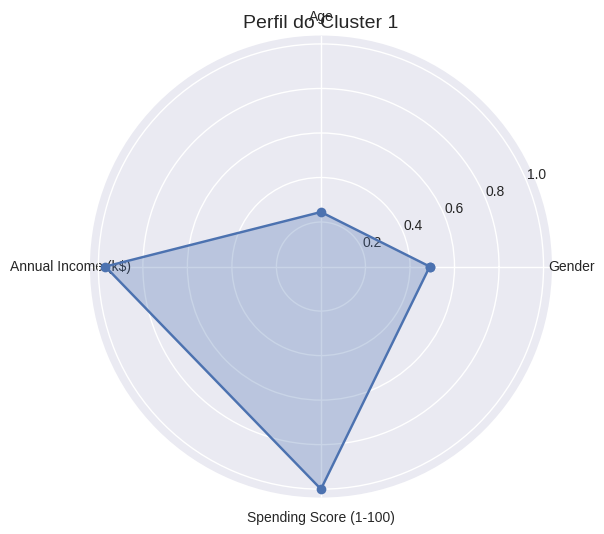

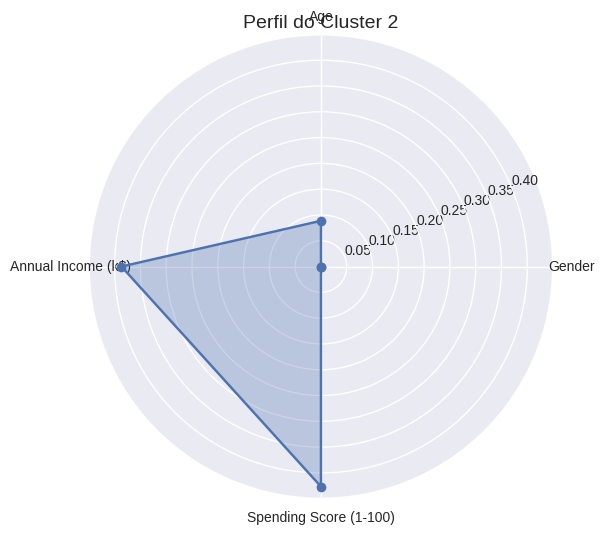

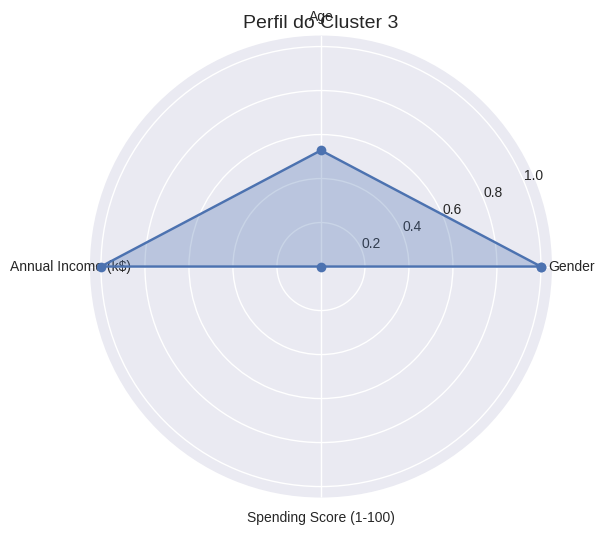

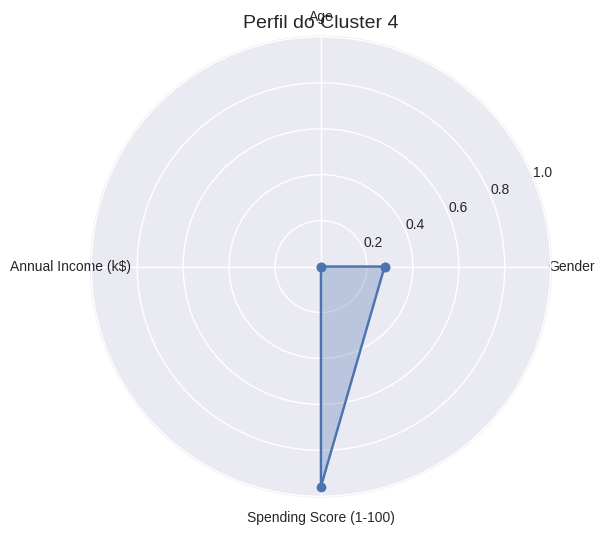

In [61]:
#@title 7 - Gráficos de Perfil dos Clusters (Radar Chart)

import matplotlib.pyplot as plt
import numpy as np

# --- Preparação dos dados ---

# Centróides já calculados anteriormente (df_centroides)
centroides = df_centroides.copy()

# Variáveis usadas no modelo
variaveis = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Normalizando os valores para escalar os gráficos radar
min_vals = centroides[variaveis].min()
max_vals = centroides[variaveis].max()

centroides_norm = (centroides[variaveis] - min_vals) / (max_vals - min_vals)


# --- Função para radar chart ---
def plot_radar(valores, labels, titulo):
    N = len(labels)
    valores = np.concatenate((valores, [valores[0]]))

    angulos = np.linspace(0, 2 * np.pi, N, endpoint=False)
    angulos = np.concatenate((angulos, [angulos[0]]))

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angulos, valores, marker='o')
    ax.fill(angulos, valores, alpha=0.3)

    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(labels)

    plt.title(titulo, size=14)
    plt.show()


# --- Gerando gráficos por cluster ---
for idx, row in centroides_norm.iterrows():
    titulo = f"Perfil do Cluster {idx}"
    valores = row.values
    plot_radar(valores, variaveis, titulo)
